# Exercise 6.5 Unsupervised Machine Learning: Clustering

### This script contains the following:

1. Importing libraries and data, renaming/removing columns

2. The elbow technique

3. k-means clustering

### 1.Importing libraries and data and renaming columns

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import os
import sklearn
from sklearn.cluster import KMeans # Here is where you import the k-means algorithm from scikit-learn.
import pylab as pl # PyLab is a convenience module that bulk imports matplotlib.

In [2]:
# This option ensures the graphs you create are displayed in your notebook without the need to "call" them specifically.

%matplotlib inline

In [3]:
# Importing Data set
path=r'C:\Users\swati\Employee Termination Analysis'
df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','df_merged.csv'), index_col = False, low_memory = False)

In [4]:
df.shape

(48756, 22)

In [5]:
df.head()

,Unnamed: 0,employee_id,terminationdate_key,age,length_of_service,city_name,department_name,job_title,store_number,gender,...,year_of_record,employment_status,business_unit,job_category,population,_merge,population_flag,age_flag,employ_status_flag,Hierarchy
0,0,1318,1/1/1900,52,17,Vancouver,Executive,CEO,35,Male,...,2006,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
1,1,1318,1/1/1900,53,18,Vancouver,Executive,CEO,35,Male,...,2007,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
2,2,1318,1/1/1900,54,19,Vancouver,Executive,CEO,35,Male,...,2008,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
3,3,1318,1/1/1900,55,20,Vancouver,Executive,CEO,35,Male,...,2009,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3
4,4,1318,1/1/1900,56,21,Vancouver,Executive,CEO,35,Male,...,2010,ACTIVE,HEADOFFICE,Board,2437000,both,Mega_city,Old_age,1,3


In [6]:
# Removing all categorical variables

df.drop(['Unnamed: 0','population_flag','employee_id','department_name','terminationdate_key','termreason_desc','termtype_desc','age_flag','_merge', 'gender', 'city_name', 'job_title', 'job_category', 'business_unit', 'employment_status'], axis = 1, inplace = True)

In [7]:
df

,age,length_of_service,store_number,year_of_record,population,employ_status_flag,Hierarchy
0,52,17,35,2006,2437000,1,3
1,53,18,35,2007,2437000,1,3
2,54,19,35,2008,2437000,1,3
3,55,20,35,2009,2437000,1,3
4,56,21,35,2010,2437000,1,3
...,...,...,...,...,...,...,...
48751,40,9,4,2010,157,1,0
48752,41,10,4,2011,157,1,0
48753,42,11,4,2012,157,1,0
48754,43,12,4,2013,157,1,0


### 2. The elbow technique

In [8]:
# Define the range of potential clusters in the data.
num_cl = range(1, 10)

# Define k-means clusters in the range assigned above.
kmeans = [KMeans(n_clusters=i) for i in num_cl] 

In [9]:
# Create a score that represents a rate of variation for the given cluster option.
score = [kmeans[i].fit(df).score(df) for i in range(len(kmeans))] 

score

d:\app\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\app\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\app\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\app\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
d:\app\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The de

[-4.5759719544977336e+16,
 -715755939400431.2,
 -187104026253468.06,
 -79685834332516.28,
 -43394358256563.09,
 -10010240578946.434,
 -3369118249614.659,
 -1982696092245.3909,
 -862910455689.7186]

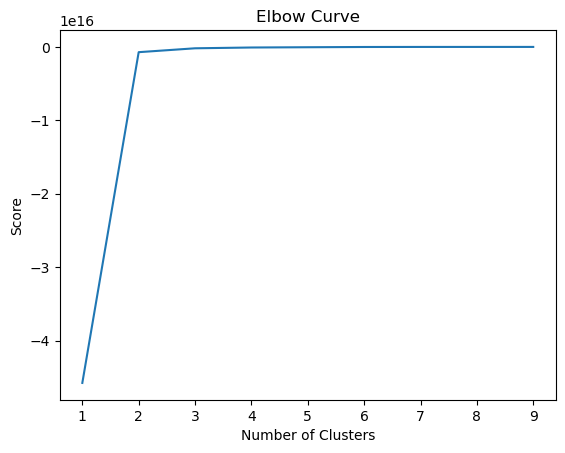

In [10]:
# Plot the elbow curve using PyLab.

pl.plot(num_cl,score)
pl.xlabel('Number of Clusters')
pl.ylabel('Score')
pl.title('Elbow Curve')
pl.show()

#### Based on the elbow, the optimal number of clusters is 2. After value of 2 on the x-axis the curve flattens out.

### 3. K-means clustering

In [11]:
# Create the k-means object.

kmeans = KMeans(n_clusters = 2,) 

In [12]:
# Fit the k-means object to the data.

kmeans.fit(df)

d:\app\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


KMeans(n_clusters=2)

In [13]:
# Create a column in the dataframe with values corresponding to which cluster every observation belongs

df['clusters'] = kmeans.fit_predict(df)

d:\app\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


In [14]:
df.head()

,age,length_of_service,store_number,year_of_record,population,employ_status_flag,Hierarchy,clusters
0,52,17,35,2006,2437000,1,3,1
1,53,18,35,2007,2437000,1,3,1
2,54,19,35,2008,2437000,1,3,1
3,55,20,35,2009,2437000,1,3,1
4,56,21,35,2010,2437000,1,3,1


In [15]:
df['clusters'].value_counts()

0    37545
1    11211
Name: clusters, dtype: int64

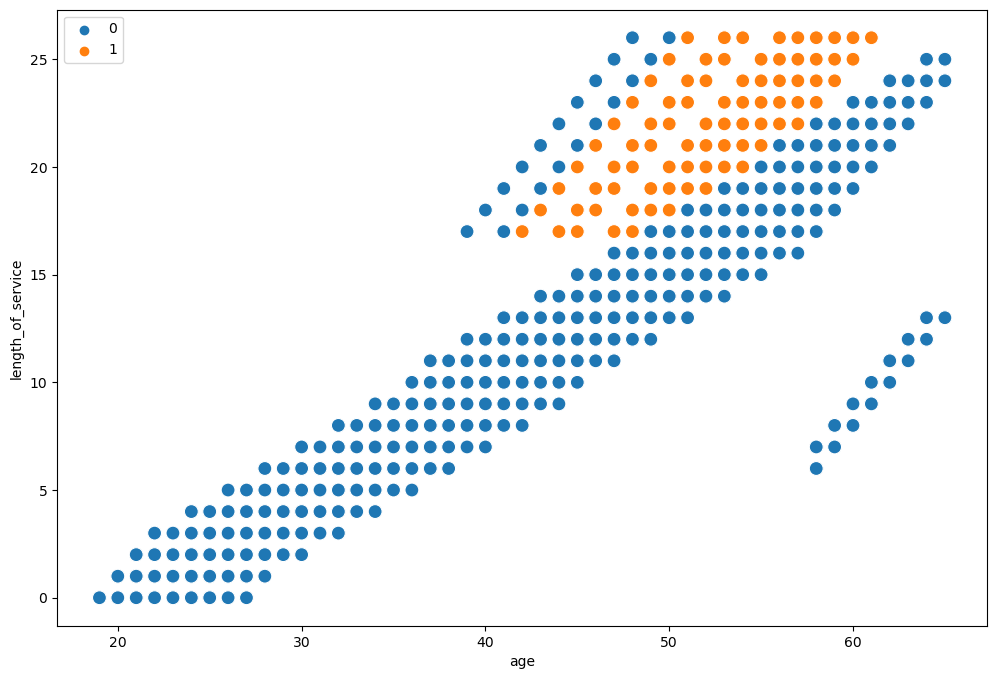

In [16]:
# Plot the clusters for the "age" and "length_of_service" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['age'], y = df['length_of_service'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('age')
plt.ylabel('length_of_service')
plt.show()

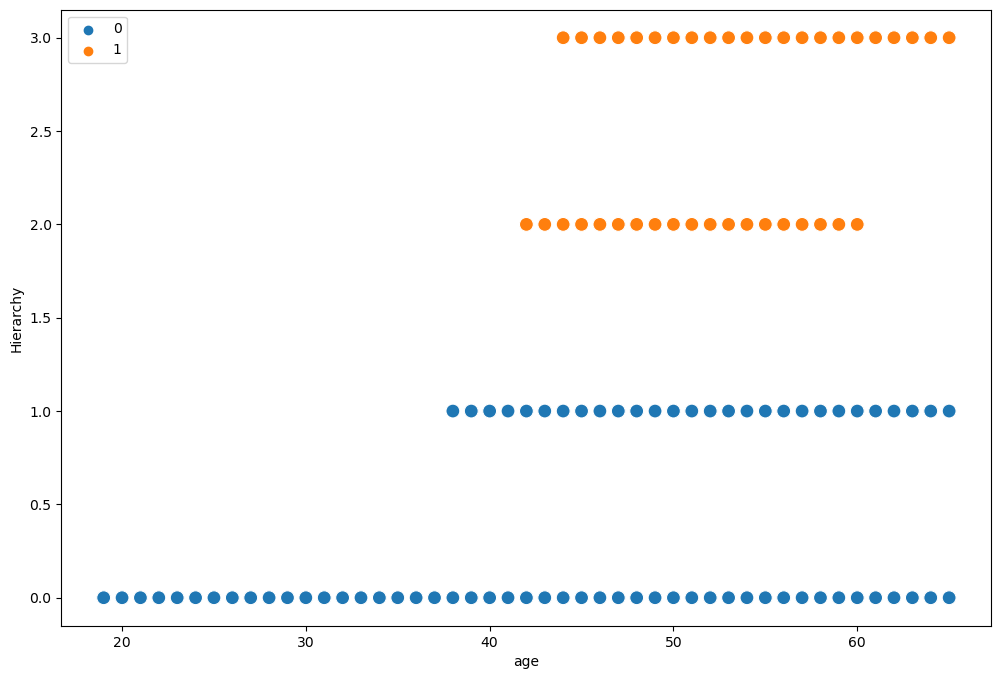

In [17]:
# Plot the clusters for the "age" and "Hierarchy" variables.

plt.figure(figsize = (12,8))
ax = sns.scatterplot(x = df['age'], y = df['Hierarchy'], hue = kmeans.labels_, s = 100) 
# Here, you're subsetting `X` for the x and y arguments to avoid using their labels. 
# `hue` takes the value of the attribute `kmeans.labels_`, which is the result of running the k-means algorithm.
# `s` represents the size of the points you want to see in the plot.

ax.grid(False) # This removes the grid from the background.
plt.xlabel('age')
plt.ylabel('Hierarchy')
plt.show()

In [18]:

df.loc[df['clusters'] == 1, 'cluster'] = 'orange'
df.loc[df['clusters'] == 0, 'cluster'] = 'blue'

In [19]:
df.groupby('cluster').agg({'age':['mean', 'median'], 
                         'length_of_service':['mean', 'median'], 
                         'Hierarchy':['mean', 'median']})

age        length_of_service        Hierarchy       
              mean median              mean median      mean median
cluster                                                            
blue     42.006099   42.0         10.397869   10.0  0.036836    0.0
orange   42.416466   42.0         10.647221   10.0  0.066542    0.0